https://matheusfacure.github.io/python-causality-handbook/13-Difference-in-Differences.html

imports

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
caso_julago = pd.read_csv('/content/caso_julago - Página1.csv')
caso_julset = pd.read_csv('/content/caso_julaset - Página1.csv')
controle_julago = pd.read_csv('/content/controle_julago - Página1.csv')
controle_julset = pd.read_csv('/content/controle_julset - Página1.csv')


In [ ]:
data = pd.read_csv('/content/meses-cluster.csv')

In [ ]:
data.head()

diff- antes e depois

In [ ]:
antes = data.query('casos == 0 and mes < 9, 0, 1')['casos_total'].mean()
depois = data.query('casos == 1 and mes == 9, 1, 0')['casos_total'].mean()
diff = depois - antes
diff

Representa a diferença entre o resultado após o tratamento e o resultado antes do tratamento no grupo que está sendo estudado. Um valor positivo indica um aumento médio nos resultados após o tratamento, enquanto um valor negativo indica uma diminuição.

comparar pós intervenção

In [ ]:
depois_controle = controle_julset ['controle']. sum()/3
diff2 = depois - depois_controle
diff2

-9044.333333333334

In [ ]:
antes_controle = controle_julago['controle']. sum()/ 2

É a mudança média nos resultados no grupo de controle que não foi submetido ao tratamento. Um valor negativo indica uma diminuição nos resultados médios após o tratamento no grupo de controle.

diff-in-diff

In [ ]:
diff_in_diff = (depois - antes) - (depois_controle - antes_controle)

diff_in_diff

4623.166666666666

Representa o efeito médio do tratamento, levando em consideração o grupo de controle e as diferenças temporais. Neste caso, um valor positivo indica que o tratamento teve um efeito médio positivo em relação ao grupo de controle e ao longo do tempo.

representação gráfica

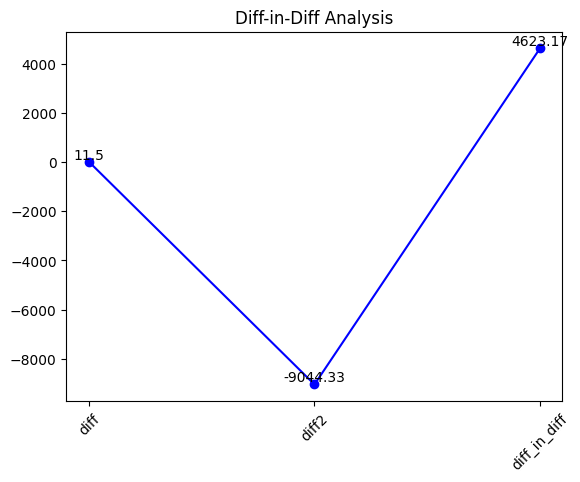

In [ ]:
# Rótulos para o eixo x
labels = ['diff', 'diff2', 'diff_in_diff']

# Valores correspondentes às métricas
values = [diff, diff2, diff_in_diff]

# Cria um gráfico de linhas
plt.plot(labels, values, marker='o', linestyle='-', color='b')

# Define um título para o gráfico
plt.title('Diff-in-Diff Analysis')

# Rotaciona os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Adiciona rótulos aos pontos de dados
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

Conclusão:
Um diff_in_diff positivo indica que a intervenção teve um impacto positivo médio em relação ao grupo de controle e ao longo do período de análise.